In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv")

C:\Users\nk845\AppData\Local\Temp\ipykernel_48416\1251518660.py:1: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv")


In [3]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:

df= pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False,parse_dates=['saledate'])

In [9]:
df['saledate'].dtype

dtype('<M8[ns]')

<Axes: xlabel='saledate', ylabel='SalePrice'>

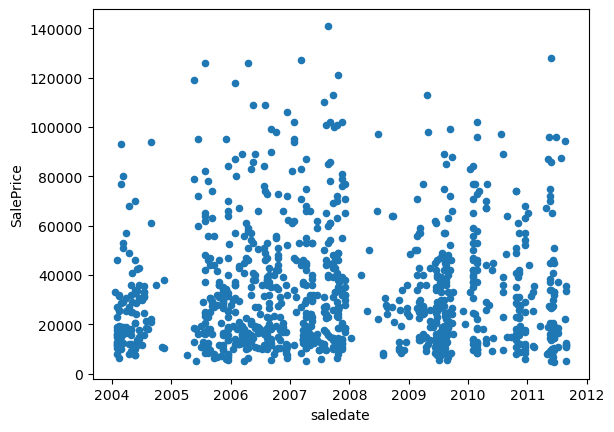

In [25]:
df[:1000].plot.scatter('saledate','SalePrice')

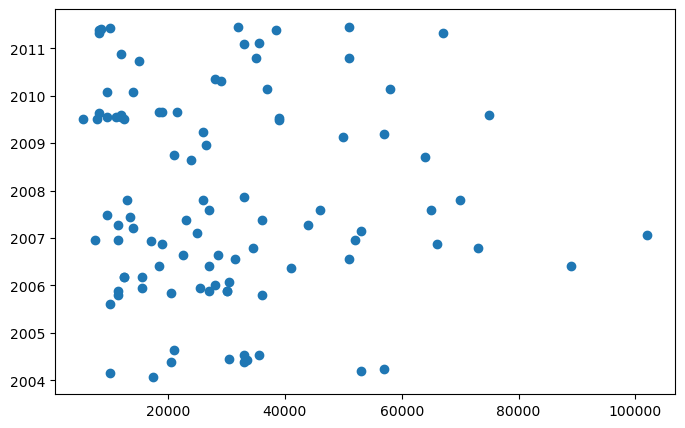

In [21]:
fig,ax= plt.subplots(figsize=(8,5))
ax.scatter(df.SalePrice[:100],df.saledate[:100])

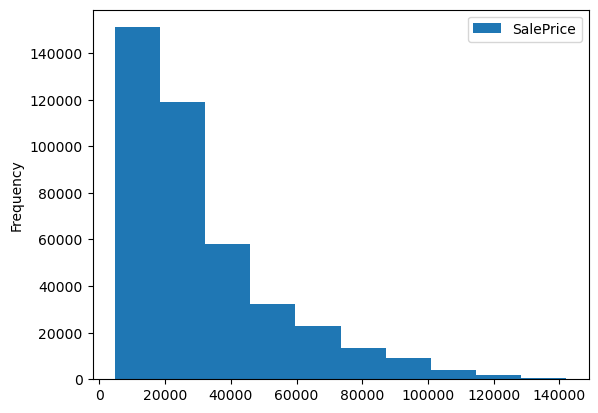

In [35]:
df.plot.hist(y='SalePrice');

<Axes: ylabel='Frequency'>

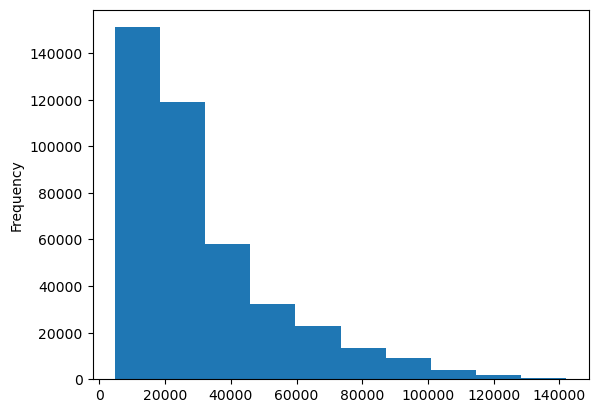

In [31]:
df.SalePrice.plot.hist()

In [36]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [3]:
df.sort_values(['saledate'],inplace=True)

In [8]:
sort_df=df.copy()


In [51]:
df.SalePrice[:2]

205615     9500.0
274835    14000.0
Name: SalePrice, dtype: float64

<Axes: ylabel='Frequency'>

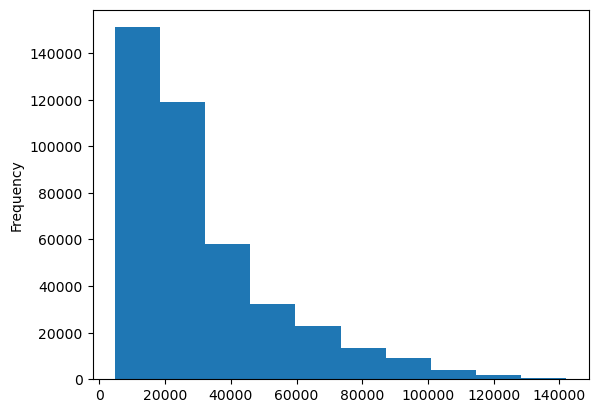

In [9]:
df.SalePrice.plot.hist()

In [ ]:
df.SalePrice

## Data manulapation OR Feature Engineering

In [66]:
#lets expract the date and year from the sale datae columns

In [15]:
sort_df['year']= sort_df.saledate.dt.year
sort_df['day']=sort_df.saledate.dt.day
sort_df['month']= sort_df.saledate.dt.month

In [16]:
sort_df.drop('saledate',axis=1,inplace=True)

In [17]:
sort_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 55 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  Int64   
 1   SalePrice                 412698 non-null  Float64 
 2   MachineID                 412698 non-null  Int64   
 3   ModelID                   412698 non-null  Int64   
 4   datasource                412698 non-null  Int64   
 5   auctioneerID              392562 non-null  Int64   
 6   YearMade                  412698 non-null  Int64   
 7   MachineHoursCurrentMeter  147504 non-null  Int64   
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

<Axes: xlabel='month'>

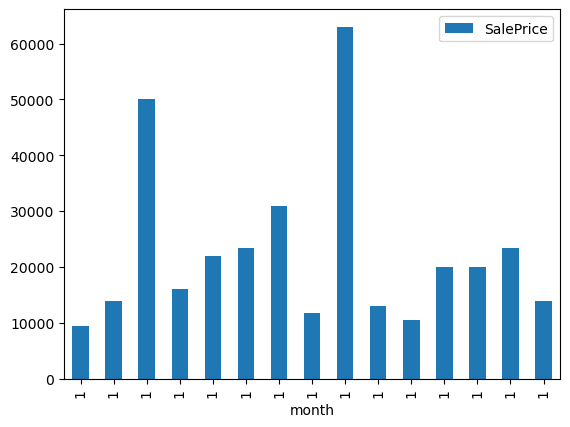

In [15]:
sort_df[:15].plot.bar(x='month',y='SalePrice')

In [14]:
max(df.SalePrice[:10])

63000.0

In [17]:
l=sort_df.sample(frac=1)

<Axes: xlabel='month'>

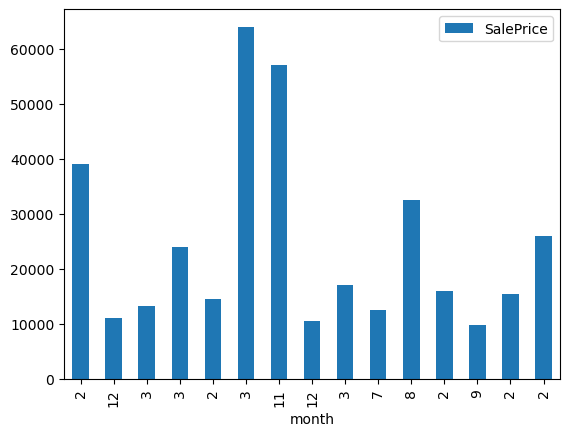

In [21]:
l[:15].plot.bar(x='month',y='SalePrice')

## collecting string dtypes columes

In [83]:
sort_df = sort_df.convert_dtypes()
for  col, series in sort_df.items():
    if pd.api.types.is_string_dtype(series):
        # sort_df[col].astype('category')
        sort_df[col]= series.astype('category')

In [19]:
sort_df.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   SalesID                   5 non-null      Int64   
 1   SalePrice                 5 non-null      Float64 
 2   MachineID                 5 non-null      Int64   
 3   ModelID                   5 non-null      Int64   
 4   datasource                5 non-null      Int64   
 5   auctioneerID              5 non-null      Int64   
 6   YearMade                  5 non-null      Int64   
 7   MachineHoursCurrentMeter  5 non-null      Int64   
 8   UsageBand                 5 non-null      category
 9   fiModelDesc               5 non-null      category
 10  fiBaseModel               5 non-null      category
 11  fiSecondaryDesc           2 non-null      category
 12  fiModelSeries             2 non-null      category
 13  fiModelDescriptor         0 non-null      category
 14

In [20]:
sort_df.state.cat.codes

0          0
1         32
2         31
3         43
4         31
          ..
412693    43
412694     8
412695     8
412696    43
412697     8
Length: 412698, dtype: int8

In [21]:
sort_df.to_csv("data/bulldozer_train_temp.csv",index=False)

In [22]:
# expotring the preprocessed dadta now importing it


In [96]:
dt= pd.read_csv("data/bulldozer_train_temp.csv",low_memory=False)

## now we  wnat to process the numeric missing data

In [97]:

for col,cont in dt.items():
    if pd.api.types.is_numeric_dtype(cont):
        if pd.isnull(cont).sum():
            print(col)

auctioneerID
MachineHoursCurrentMeter


In [98]:
for col,cont in dt.items():
    if pd.api.types.is_numeric_dtype(cont):
        if pd.isnull(cont).sum():
            dt[col+"_missing"]=pd.isnull(cont)
            dt[col]=cont.fillna((cont).median())

In [100]:
#to non numeric data

In [101]:
for col,cont in dt.items():
    if not pd.api.types.is_numeric_dtype(cont):
        # gititng the misisng value
        dt[col+'_missing']=pd.isnull(cont)
        dt[col]=pd.Categorical(dt[col]).codes+1
        
            

## Fiting the model

In [102]:
from sklearn.ensemble import RandomForestRegressor

In [94]:
%%time
model= RandomForestRegressor(n_jobs=-1,random_state=42)
model.fit(dt.drop('SalePrice',axis=1),dt.SalePrice)

Wall time: 1min 54s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [95]:
model.score(dt.drop('SalePrice',axis=1),dt.SalePrice)

0.9875185503190395

**Splitting** of data

In [103]:
df_val= dt[dt.year==2012]
df_train=dt[dt.year!=2012]

In [104]:
df_val

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_missing,Stick_Length_missing,Thumb_missing,Pattern_Changer_missing,Grouser_Type_missing,Backhoe_Mounting_missing,Blade_Type_missing,Travel_Controls_missing,Differential_Type_missing,Steering_Controls_missing
401125,1222837,31000.0,902859,1376,121,3.0,1000,0.0,0,683,...,False,False,False,False,False,True,True,True,True,True
401126,1222839,54000.0,1048320,36526,121,3.0,2006,4412.0,3,4641,...,False,False,False,False,False,True,True,True,True,True
401127,1222841,26500.0,999308,4587,121,3.0,2000,10127.0,3,414,...,False,False,False,False,False,True,True,True,True,True
401128,1222843,10000.0,1062425,1954,121,3.0,1000,4682.0,2,1653,...,False,False,False,False,False,True,True,True,True,True
401129,1222845,35000.0,1032841,4701,121,3.0,2002,8150.0,3,989,...,True,True,True,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,0.0,0,490,...,False,False,False,False,False,True,True,True,True,True
412694,6333345,10500.0,1882122,21436,149,2.0,2005,0.0,0,491,...,False,False,False,False,False,True,True,True,True,True
412695,6333347,12500.0,1944213,21435,149,2.0,2005,0.0,0,490,...,False,False,False,False,False,True,True,True,True,True
412696,6333348,10000.0,1794518,21435,149,2.0,2006,0.0,0,490,...,False,False,False,False,False,True,True,True,True,True


In [105]:
len(df_train)

401125

In [106]:
x_train,y_train= df_train.drop('SalePrice',axis=1),df_train.SalePrice
x_val,y_val=df_val.drop('SalePrice',axis=1),df_val.SalePrice

In [72]:
%%time
model.fit(x_train,y_train)


NameError: name 'model' is not defined

In [118]:
model.score(x_val,y_val)

0.873780041942162

## custom eval matrix

In [128]:
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_log_error,mean_squared_log_error

In [131]:

def Rmse(y_true,y_pred):
    return  np.sqrt(mean_squared_log_error(y_true,y_pred))

def eval_metrics(model):

    train_pred= model.predict(x_train)
    valid_pred=model.predict(x_val)
    scores={
        "training_score": mean_squared_error(y_train,train_pred),
        "validsation_score":mean_squared_error(y_val,valid_pred),
        "Rmese_tainging":Rmse(y_train,train_pred),
        "Rmse_valid":Rmse(y_val,valid_pred)
    }
    return scores
    
    

## Hypermeter tunning

In [75]:
from sklearn.model_selection import RandomizedSearchCV

In [157]:
params_gird={
    'max_samples':[10000],
    'max_depth':[3,5,10,None],
    'min_samples_split': np.arange(2,20,2),
     'n_estimators': np.arange(10,100,10),
    
    
    'min_samples_leaf': np.arange(1,20,2),
    'max_features':[0.5,1,'sqrt','auto'],
    

    
    
    
}

In [76]:
%%time
rand_model= RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=82),params_gird,cv=5,n_iter=2)
rand_model.fit(x_train,y_train)

NameError: name 'params_gird' is not defined

In [159]:
rand_model.score(x_val,y_val)

0.7908857858226304

In [160]:
rand_model.best_params_

{'n_estimators': 30,
 'min_samples_split': 16,
 'min_samples_leaf': 13,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [161]:
eval_metrics(rand_model)

{'training_score': 101827731.77868341,
 'validsation_score': 143634785.08685583,
 'Rmese_tainging': 0.29609414033236975,
 'Rmse_valid': 0.3217894787372709}

 ## Ideal model

In [124]:
%%time
feature_order = x_train.columns.tolist()

ideal_model= RandomForestRegressor(n_estimators=40,min_samples_leaf=1,min_samples_split=14,max_features=0.5,max_samples=None,n_jobs=-1,random_state=42)

ideal_model.fit(x_train,y_train)

Wall time: 14.9 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [164]:
eval_metrics(ideal_model)

{'training_score': 22618933.08680395,
 'validsation_score': 80540445.24111712,
 'Rmese_tainging': 0.1468593667188986,
 'Rmse_valid': 0.2434537740286916}

In [108]:
ideal_model

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [125]:
test_dt= pd.read_csv("data/bluebook-for-bulldozers/Test.csv",parse_dates=['saledate'],low_memory=False)
test_dt= test_dt.convert_dtypes()
test_dt['auctioneerID_missing']=False

In [126]:
def preprocess(test_dt):
    test_dt['year']= test_dt.saledate.dt.year
    test_dt['day']=test_dt.saledate.dt.day
    test_dt['month']= test_dt.saledate.dt.month
    test_dt.drop(['saledate'],axis=1,inplace=True)
    #preprocessing the data
    for col,content in test_dt.items():
        if not pd.api.types.is_numeric_dtype(content):
            test_dt[col+'_missing']=pd.isnull(content)
            
            
            test_dt[col]= pd.Categorical(test_dt[col]).codes+1
        elif pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                test_dt[col+"_missing"]=pd.isnull(content)
                test_dt[col]= content.fillna(content.median())
    return test_dt
                


In [128]:
preprocess(test_dt)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_missing,Stick_Length_missing,Thumb_missing,Pattern_Changer_missing,Grouser_Type_missing,Backhoe_Mounting_missing,Blade_Type_missing,Travel_Controls_missing,Differential_Type_missing,Steering_Controls_missing
0,1227829,1006309,3168,121,3,1999,3688,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286,2,566,196,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525,0,713,235,...,False,False,False,False,False,True,True,True,True,True
12453,6643173,2558332,21434,149,2,2005,3525,0,186,80,...,False,False,False,False,False,True,True,True,True,True
12454,6643184,2558342,21437,149,2,1000,3525,0,325,123,...,False,False,False,False,False,True,True,True,True,True
12455,6643186,2558343,21437,149,2,2006,3525,0,325,123,...,False,False,False,False,False,True,True,True,True,True


In [129]:
test_dt = test_dt.reindex(columns=feature_order, fill_value=0)

test_pred= ideal_model.predict(test_dt)

In [121]:
ideal_model.score()

(401125, 100)

In [122]:
test_dt.shape

(12457, 100)

In [130]:
len(test_pred)

12457

In [131]:
df_pred= pd.DataFrame({'SalePrice':test_pred,
                      'SaleID':test_dt.SalesID
                      })

In [133]:
df_pred.to_csv("data/price_prediction_test(saleid vs saleprice.csv",index=False)

## feature importance

In [135]:
test_pred

array([19469.20353118, 17627.71694315, 45905.64444609, ...,
       14917.9861153 , 18545.42383707, 23046.66352464])

In [170]:
def visual_feature(importance,columns,n=20):
    fig,ax= plt.subplots(figsize=(10,6))
   
    ax.barh(columns[:n],importance[:n])
    ax.invert_yaxis()
   
    plt.show()


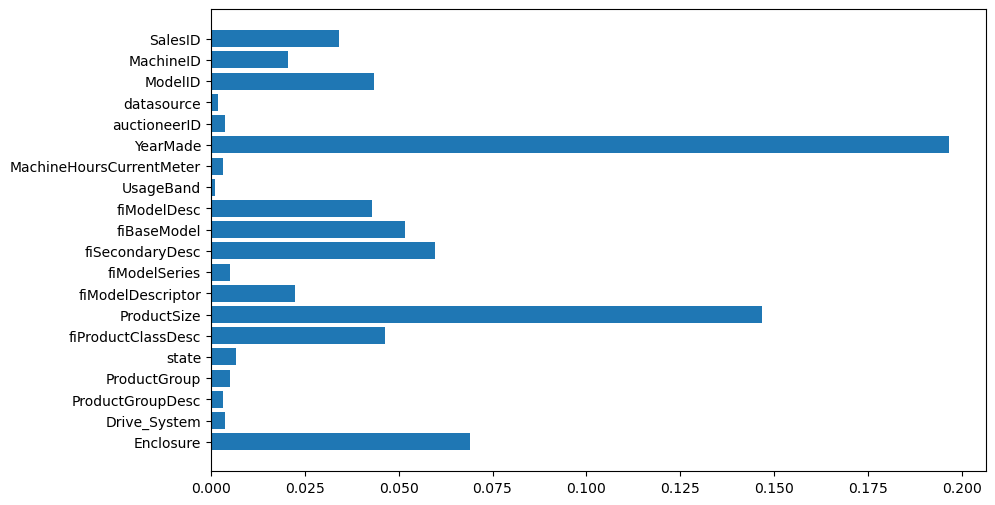

In [173]:
visual_feature(ideal_model.feature_importances_,x_train.columns,n=20)